In [1]:
import keras

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
import os, shutil

In [3]:
from IPython.display import display
from PIL import Image

In [4]:
# # The path to the directory where the original
# # dataset was uncompressed
# original_dataset_dir = '/Users/fchollet/Downloads/kaggle_original_data'
# original_dataset_dir = '/home/bstell_ml001/.kaggle/competitions/dogs-vs-cats/train'
original_dataset_dir = '/home/ubuntu/.kaggle/competitions/dogs-vs-cats/train'

# # The directory where we will
# # store our smaller dataset
# base_dir = '/Users/fchollet/Downloads/cats_and_dogs_small'
# base_dir = '/home/bstell_ml001/Downloads/cats_and_dogs_small'
base_dir = '/home/ubuntu/Downloads/cats_and_dogs_small'
shutil.rmtree(base_dir, True)
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [5]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [6]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=((150, 150, 3))))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [8]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              #optimizer='adam',
              metrics=['acc'])

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
from PIL import Image

In [11]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('label batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
label batch shape: (20,)


In [12]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50)

Epoch 1/30
100/100 [==============================] - 18s 175ms/step - loss: 0.6907 - acc: 0.5345 - val_loss: 0.6727 - val_acc: 0.5630
Epoch 2/30
100/100 [==============================] - 15s 154ms/step - loss: 0.6510 - acc: 0.6210 - val_loss: 0.6431 - val_acc: 0.6210
Epoch 3/30
100/100 [==============================] - 15s 154ms/step - loss: 0.6081 - acc: 0.6720 - val_loss: 0.6463 - val_acc: 0.6040
Epoch 4/30
100/100 [==============================] - 16s 156ms/step - loss: 0.5661 - acc: 0.7025 - val_loss: 0.6200 - val_acc: 0.6590
Epoch 5/30
100/100 [==============================] - 15s 154ms/step - loss: 0.5375 - acc: 0.7175 - val_loss: 0.5882 - val_acc: 0.6910
Epoch 6/30
100/100 [==============================] - 15s 153ms/step - loss: 0.4959 - acc: 0.7550 - val_loss: 0.5744 - val_acc: 0.6920
Epoch 7/30
100/100 [==============================] - 15s 154ms/step - loss: 0.4723 - acc: 0.7735 - val_loss: 0.5739 - val_acc: 0.7060
Epoch 8/30
100/100 [==============================] - 1

In [13]:
model.save('cats_and_dogs_small_1.h5')

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [15]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

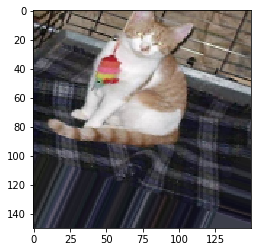

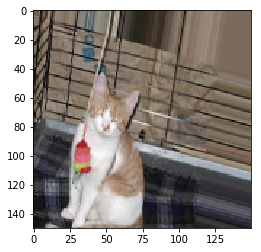

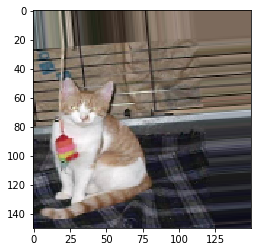

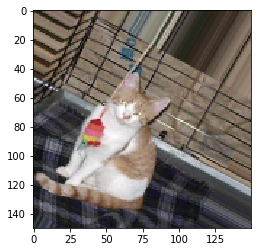

In [16]:
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [18]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 45s 447ms/step - loss: 0.6940 - acc: 0.5000 - val_loss: 0.6833 - val_acc: 0.6028
Epoch 2/100
100/100 [==============================] - 38s 384ms/step - loss: 0.6820 - acc: 0.5597 - val_loss: 0.6742 - val_acc: 0.5704
Epoch 3/100
100/100 [==============================] - 40s 396ms/step - loss: 0.6708 - acc: 0.5878 - val_loss: 0.7040 - val_acc: 0.5400
Epoch 4/100
100/100 [==============================] - 39s 390ms/step - loss: 0.6603 - acc: 0.6009 - val_loss: 0.6307 - val_acc: 0.6434
Epoch 5/100
100/100 [==============================] - 39s 386ms/step - loss: 0.6422 - acc: 0.6437 - val_loss: 0.6306 - val_acc: 0.6415
Epoch 6/100
100/100 [==============================] - 41s 410ms/step - loss: 0.6244 - acc: 0.6581 - val_loss: 0.6042 - val_acc: 0.6713
Epoch 7/100
100/100 [==============================] - 39s 387ms/step - loss: 0.6196 - acc: 0.6575 -

100/100 [==============================] - 39s 392ms/step - loss: 0.4136 - acc: 0.8175 - val_loss: 0.4402 - val_acc: 0.8001
Epoch 61/100
100/100 [==============================] - 39s 386ms/step - loss: 0.4157 - acc: 0.8103 - val_loss: 0.4452 - val_acc: 0.7893
Epoch 62/100
100/100 [==============================] - 41s 408ms/step - loss: 0.3989 - acc: 0.8181 - val_loss: 0.4290 - val_acc: 0.8115
Epoch 63/100
100/100 [==============================] - 39s 387ms/step - loss: 0.4083 - acc: 0.8128 - val_loss: 0.5201 - val_acc: 0.7684
Epoch 64/100
100/100 [==============================] - 39s 388ms/step - loss: 0.4019 - acc: 0.8128 - val_loss: 0.4193 - val_acc: 0.8135
Epoch 65/100
100/100 [==============================] - 38s 384ms/step - loss: 0.4091 - acc: 0.8125 - val_loss: 0.4279 - val_acc: 0.8077
Epoch 66/100
100/100 [==============================] - 39s 387ms/step - loss: 0.4013 - acc: 0.8216 - val_loss: 0.4464 - val_acc: 0.7900
Epoch 67/100
100/100 [==============================] 

In [19]:
model.save('cats_and_dogs_small_2.h5')

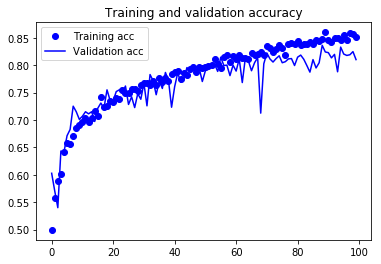

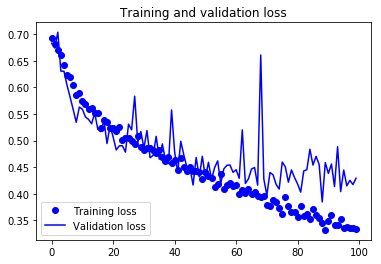

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()